<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANÁLISIS DE COTIZACIONES EN BOLSA - ACCIONES DE ARGOS</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto


<h2 style="color: #03396c;">INTRODUCCION</h2>

La base de datos fue tomada de la pagina _https://es.investing.com/equities/grupoargos-historical-data_ la cual proporciona estos datos de manera gratuita al publico, la inspiracion para desarrollar este trabajo con esta base es conocer como se comportan los metodos aprendidos en clase en un enfoque econocimo y sobre todo en el area de las acciones, con lo cual decidimos tomar los datos de un grupo empresarial Colombiano y realizar el analisis correspondiente para desarrollar el proyecto para la clase de series de tiempo. 

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Acciones <span style="color: #03396c;">**DIARIAS**</span> del Grupo ARGOS
- 3401 Datos tomado (Desde el 7/11/20114 Hasta 28/02/2024)
- Variables: Fecha, Último, <span style="color: #03396c;">**_Apertura_**</span>, Máximo, Mínimo, Vol, %Var.

In [1]:
# Color2  <span style="color: #03396c;"></span>

<center><h1 style="color: #011f4b;">PRIMER ANALISIS Y DESCRIPCION DE LA SERIE</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [7]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [8]:
# Cargar el archivo CSV en un DataFrame de pandas
ARGOS = pd.read_csv(data_folder_path + "G_ARGOS.csv", sep=';')

In [9]:
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     2440 non-null   datetime64[ns]
 1   Último    2440 non-null   object        
 2   Apertura  2440 non-null   object        
 3   Máximo    2440 non-null   object        
 4   Mínimo    2440 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.4+ KB
          Fecha     Último   Apertura     Máximo     Mínimo
0    2019-12-30  17.800,00  18.280,00  18.280,00  17.800,00
1    2019-12-27  18.300,00  18.120,00  18.400,00  18.040,00
2    2019-12-26  18.120,00  18.240,00  18.340,00  18.060,00
3    2019-12-24  18.340,00  18.220,00  18.780,00  18.200,00
4    2019-12-23  18.880,00  18.360,00  18.960,00  18.360,00
...         ...        ...        ...        ...        ...
2435 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00
2436 2010-01-07  19.980,00  19.7

In [10]:
FC = pd.DataFrame({'Fecha': pd.date_range(start=ARGOS['Fecha'].min(), end=ARGOS['Fecha'].max(), freq='D')})
FC.info()
print(FC)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   3648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.6 KB
          Fecha
0    2010-01-04
1    2010-01-05
2    2010-01-06
3    2010-01-07
4    2010-01-08
...         ...
3643 2019-12-26
3644 2019-12-27
3645 2019-12-28
3646 2019-12-29
3647 2019-12-30

[3648 rows x 1 columns]


In [11]:
# Combinar DataFrame de fechas completas con datos existentes
ARGOS = pd.merge(FC, ARGOS, on='Fecha', how='left')

# Rellenar los valores faltantes usando el último valor conocido (last observation carried forward)
# Rellenar los valores faltantes usando el método ffill() 
ARGOS['Último'] = ARGOS['Último'].ffill()
ARGOS['Apertura'] = ARGOS['Apertura'].ffill()
ARGOS['Máximo'] = ARGOS['Máximo'].ffill()
ARGOS['Mínimo'] = ARGOS['Mínimo'].ffill()

ARGOS.info()
ARGOS.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   object        
 2   Apertura  3648 non-null   object        
 3   Máximo    3648 non-null   object        
 4   Mínimo    3648 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 142.6+ KB


Fecha     Último   Apertura     Máximo     Mínimo
0 2010-01-04  18.980,00  18.980,00  19.700,00  18.980,00
1 2010-01-05  19.560,00  19.500,00  19.560,00  19.100,00
2 2010-01-06  19.780,00  19.400,00  19.780,00  19.360,00
3 2010-01-07  19.980,00  19.700,00  19.980,00  19.700,00
4 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00

In [12]:
# Convertir la columna de fecha al formato de fecha
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

# Convertir las comas en puntos en las columnas numéricas
columnas_numericas = ['Último', 'Apertura', 'Máximo', 'Mínimo']
# Eliminar los puntos de los números antes de convertirlos a float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\,', '.', regex=True)
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\.', '', regex=True)

# Convertir las columnas numéricas al tipo float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].astype(float)

# Dividir entre 1000 para eliminar los ceros adicionales
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].div(100000)

# Reordenar el DataFrame por fecha de la más antigua a la más reciente
ARGOS = ARGOS.sort_values(by='Fecha')

# Reiniciar el índice
ARGOS = ARGOS.reset_index(drop=True)

In [13]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   float64       
 2   Apertura  3648 non-null   float64       
 3   Máximo    3648 non-null   float64       
 4   Mínimo    3648 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.6 KB
          Fecha  Último  Apertura  Máximo  Mínimo
0    2010-01-04   18.98     18.98   19.70   18.98
1    2010-01-05   19.56     19.50   19.56   19.10
2    2010-01-06   19.78     19.40   19.78   19.36
3    2010-01-07   19.98     19.70   19.98   19.70
4    2010-01-08   20.30     19.70   20.30   19.70
...         ...     ...       ...     ...     ...
3643 2019-12-26   18.12     18.24   18.34   18.06
3644 2019-12-27   18.30     18.12   18.40   18.04
3645 2019-12-28   18.30     18.12   18.40   18.04
3646 2019-1

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, las cuales son: _Último, Apertura, Máximo y Mínimo_, este reescalado mencionado consiste en eliminar los miles "000", es decir 3 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

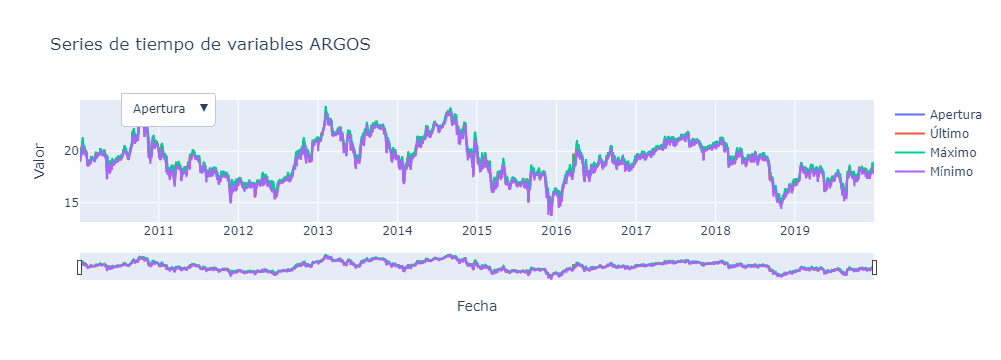

In [14]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Último'], mode='lines', name='Último'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Máximo'], mode='lines', name='Máximo'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Mínimo'], mode='lines', name='Mínimo'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Apertura",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Serie de tiempo variable Apertura"}]),
                dict(label="Último",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Serie de tiempo variable Último"}]),
                dict(label="Máximo",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Serie de tiempo variable Máximo"}]),
                dict(label="Mínimo",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Serie de tiempo variable Mínimo"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables ARGOS')

# Mostrar el gráfico
fig.show()

Del gafico anterio podemos conlcuir que todas las variables se comportan de manera similar en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos no tendra una influencia positiva o negativa en nuestro estudio, sin embargo podemos notar que entre el 2021 y 2022 hubo una caida muy brusca del precio de las acciones del grupo ARGOS lo cual si podra afectar de manera directa los resultados que obtengamos.

<h2 style="color: #011f4b;">ELECCION DE LA VARIABLE Y DESARROLLO DE METODOLOGIAS</h2>

En la parte anterior del codigo pudimos ver como todas las variables poseen un comportamiento bastante parecido, lo cual tiene sentido en el ambito en el cual nos encontramos, dado que estamos hablando del precio de las acciones de una compañia y este suele comportarce de forma muy similar hablando en terminos de las variables del precio de la apertura, el precio maximo y minimo o el cierre. 

Por esto hemos decidido que la variable elegida para desarrollar el proyecto sera la  <span style="color: #03396c;">**_Apertura_**</span> o mejor dicho el precio de la apertura diaria del valor de la accion en la bolsa para el _Grupo Argos_, en miles de pesos Colombianos. Teniendo esto en cuenta, tambien podríamos aplicar el siguiente desarrollo a las otras variables pero eso no sera tema principal en este documento.

In [15]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]

# Resumen estadístico de la serie
print(Serie.describe())

                     Fecha     Apertura
count                 3648  3648.000000
mean   2015-01-01 12:00:00    19.112445
min    2010-01-04 00:00:00    13.700000
25%    2012-07-03 18:00:00    17.680000
50%    2015-01-01 12:00:00    19.080000
75%    2017-07-01 06:00:00    20.440000
max    2019-12-30 00:00:00    24.400000
std                    NaN     1.902642


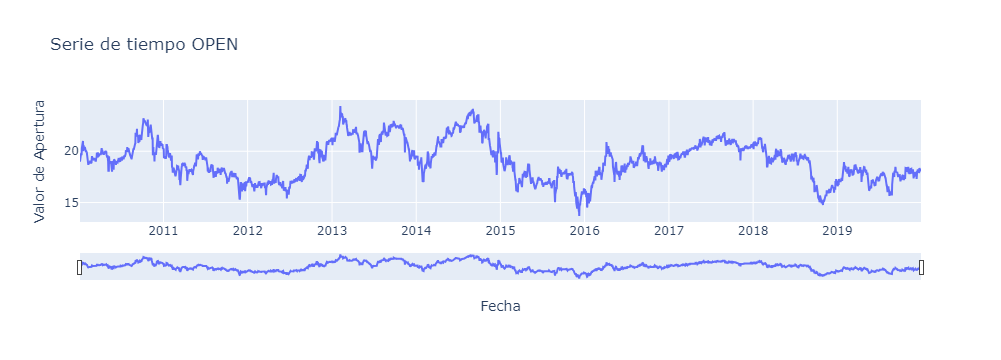

In [16]:
import plotly.graph_objects as go
import pandas as pd

# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=Apertura.index, y=Apertura.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de Apertura')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo OPEN')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA ESTABILIZACION DE LA VARIANZA</h3>

In [17]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [18]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(ARGOS['Apertura'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Apertura, lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.17071798004770206
[3.82402513 3.86880216 3.86026874 ... 3.7476868  3.7476868  3.76211352]


A pesar de que el valor de lambda es muy cercana a 0 y es probable que al graficar el intervalo de confianza para este incluya el 0 por lo que podríamos usar perfectamente la tranformacion log, tomamos la decision de usar la transformacion de BoxCox porque le consideramos un ajuste más robusto y justificado.

In [19]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data1, fitted_lambda1 = stats.boxcox(serie_boxcox)
print("Lambda óptimo para Box-Cox:", fitted_lambda1)

Lambda óptimo para Box-Cox: 0.9558530277030802


Podemos observar que al realizar nuevamente la busqueda del lamnbda óptimo para los datos transformados por el primer BoxCox estes es muy cercano a 1, por lo que podemos decir que la transformacion de BoxCox hizo un buen trabajo estabilizando la varianza de la serie. 

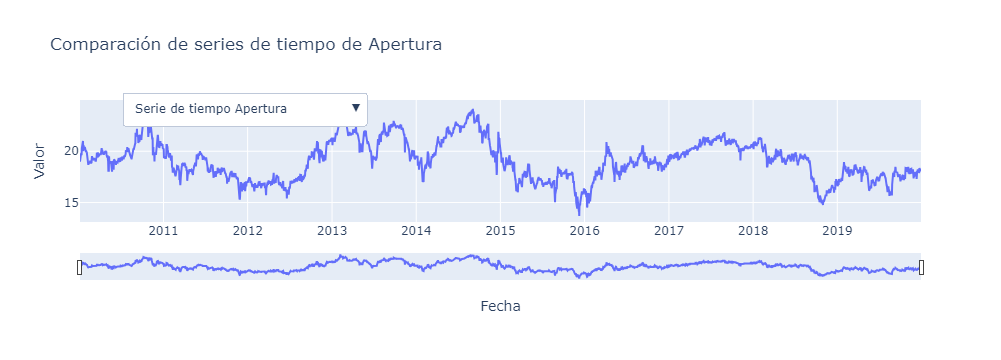

In [17]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Serie de tiempo Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_boxcox, mode='lines', name='Serie de tiempo Apertura-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo Apertura"}]),
                dict(label="Serie de tiempo Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Apertura-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Apertura')

# Mostrar el gráfico
fig.show()

A partir de este punto intentaremos mostrar los resultados para ambas series teniendo en cuenta los datos en su escala original y los datos en escala log, esto con la intencion de tener una comparacion más directa sobre lo que puede causar la tranformacion de los datos en los resultados de nuestro ejercicio.

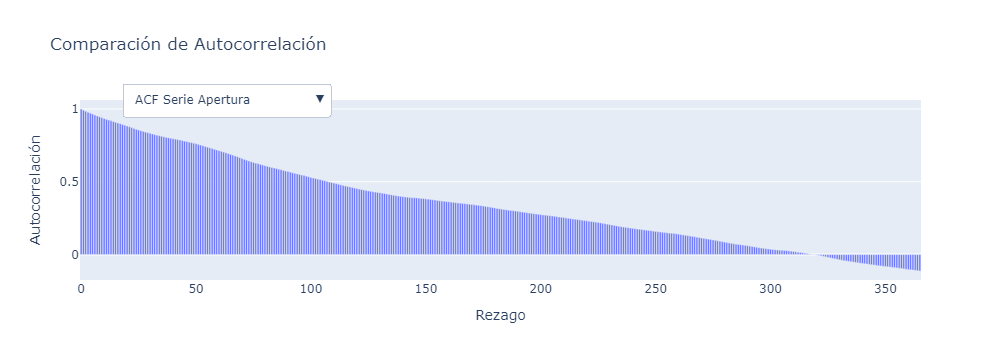

In [22]:
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Calcular la autocorrelación para ambas series
acf_apertura = sm.tsa.acf(ARGOS['Apertura'], nlags=365)
acf_boxcox = sm.tsa.acf(serie_boxcox, nlags=365)

# Crear la figura
fig = go.Figure()

# Agregar la autocorrelación de la serie original
fig.add_trace(go.Bar(x=np.arange(len(acf_apertura)), y=acf_apertura, name='ACF Serie Apertura'))

# Agregar la autocorrelación de la serie Box-Cox
fig.add_trace(go.Bar(x=np.arange(len(acf_boxcox)), y=acf_boxcox, name='ACF Serie Apertura-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="ACF Serie Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Autocorrelación Serie Apertura"}]),
                dict(label="ACF Serie Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Autocorrelación Serie Apertura-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Rezago')

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Autocorrelación')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de Autocorrelación')

# Mostrar el gráfico
fig.show()

El grafico de autocorrelacion muestra un disminucion progresiva de la autocorrelacion entre los rezagos lo cual nos da a entender que existe un tendencia en nuestra seríe, por lo que vamos a intentar hacer una estimacion de esta tendencia usando metodos de regresion tanto parametricos como no parametricos y evaluar cual de ellos nos es más util para eliminar la tendencia de nuesta seríe.

<h3 style="color: #011f4b;">ESTIMACION Y ELIMINACION DE LA TENDENCIA</h3>

In [18]:
import statsmodels.api as sm

# Estimación de la tendencia utilizando lm (regresión lineal) para datos originales
X_original = sm.add_constant(np.arange(len(ARGOS["Apertura"])))  # Añadir una columna de unos para intercepto
fit_Apertura_original = sm.OLS(ARGOS["Apertura"], X_original).fit()

# Imprimir resumen del modelo para datos originales
print(fit_Apertura_original.summary())

                            OLS Regression Results                            
Dep. Variable:               Apertura   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     117.5
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           5.85e-27
Time:                        12:48:10   Log-Likelihood:                -7464.5
No. Observations:                3648   AIC:                         1.493e+04
Df Residuals:                    3646   BIC:                         1.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6944      0.062    317.613      0.0

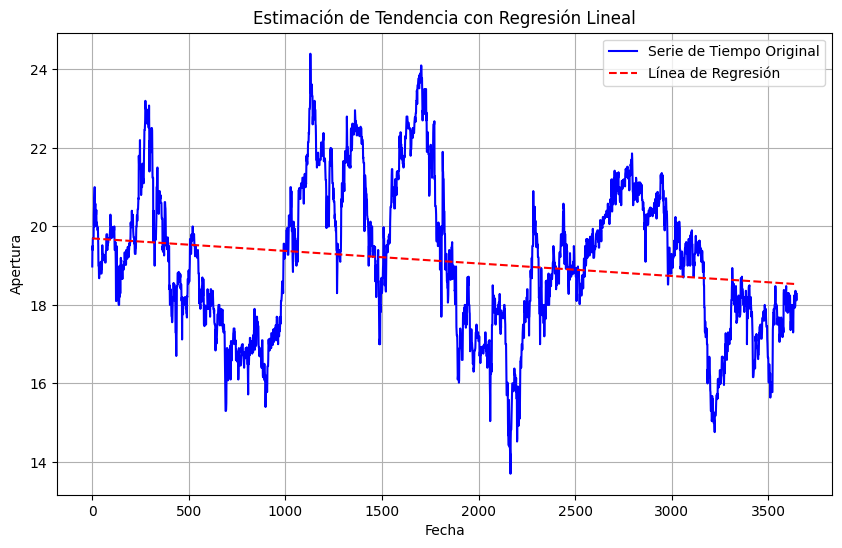

In [19]:
# Obtener la predicción de la regresión lineal
y_pred = fit_Apertura_original.predict(X_original)

# Gráfico de la serie de tiempo y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, ARGOS["Apertura"], label='Serie de Tiempo Original', color='blue')
plt.plot(ARGOS.index, y_pred, label='Línea de Regresión', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Estimación de Tendencia con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

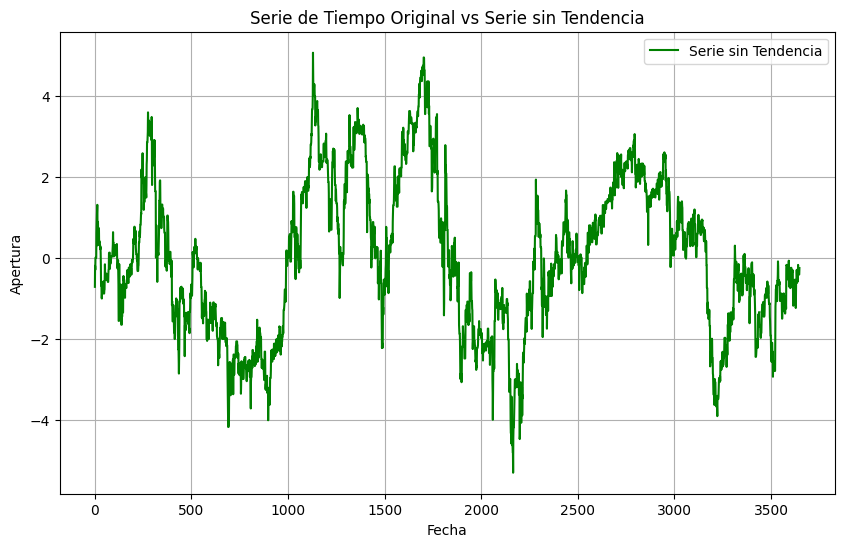

In [20]:
# Eliminar la tendencia de la serie original
Apertura_sin_tendencia = ARGOS["Apertura"] - fit_Apertura_original.fittedvalues

# Gráfico de la serie de tiempo original y la serie sin tendencia
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, Apertura_sin_tendencia, label='Serie sin Tendencia', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

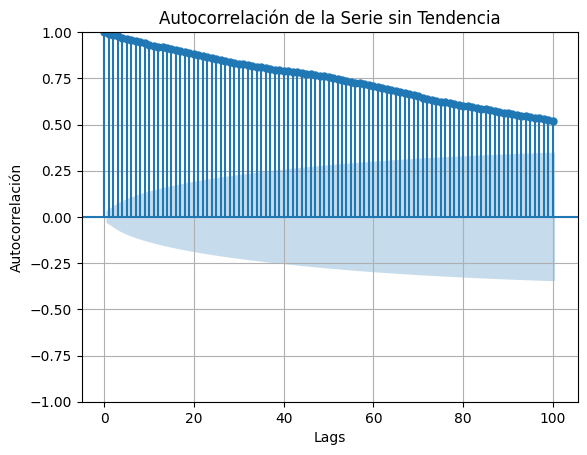

In [22]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(Apertura_sin_tendencia, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(Apertura_sin_tendencia, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

El gráfico de ACF (Autocorrelación) no parece mostrarnos que se haya eliminado la tendencia utilizando el método de regresión lineal en los datos sin transformar, esto se puede evidenciar dado que el descenso de la correlación hacia el 0 entre retardo y retardo es muy lento.

In [23]:
# Modelo en escala log para los datos en escala logarítmica
BoxCox = serie_boxcox
X_log = sm.add_constant(np.arange(len(serie_boxcox)))  # Añadir una columna de unos para intercepto
fit_BoxCox = sm.OLS(serie_boxcox, X_log).fit()

# Imprimir resumen del modelo en escala log para los datos en escala logarítmica
print(fit_BoxCox.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           6.28e-27
Time:                        12:48:11   Log-Likelihood:                 1460.6
No. Observations:                3648   AIC:                            -2917.
Df Residuals:                    3646   BIC:                            -2905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8791      0.005    722.471      0.0

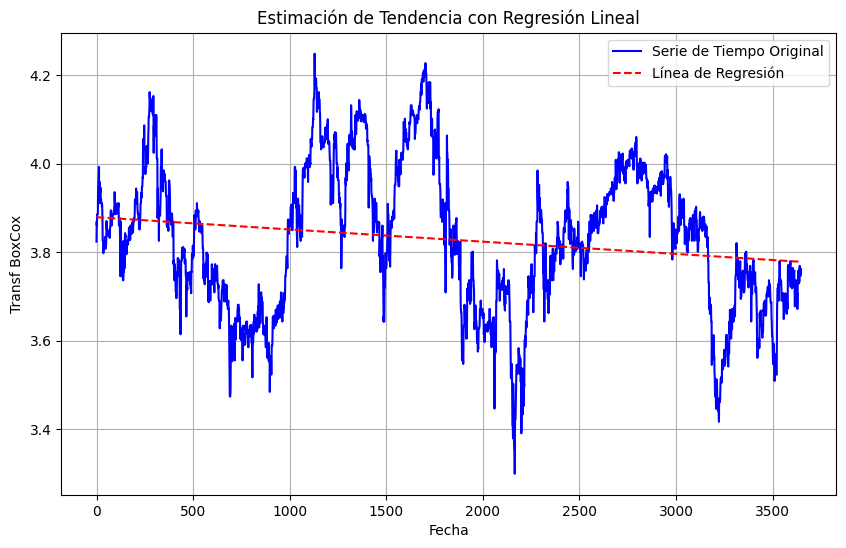

In [24]:
# Obtener la predicción de la regresión lineal
y_pred = fit_BoxCox.predict(X_original)

# Gráfico de la serie de tiempo y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox, label='Serie de Tiempo Original', color='blue')
plt.plot(ARGOS.index, y_pred, label='Línea de Regresión', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('Estimación de Tendencia con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

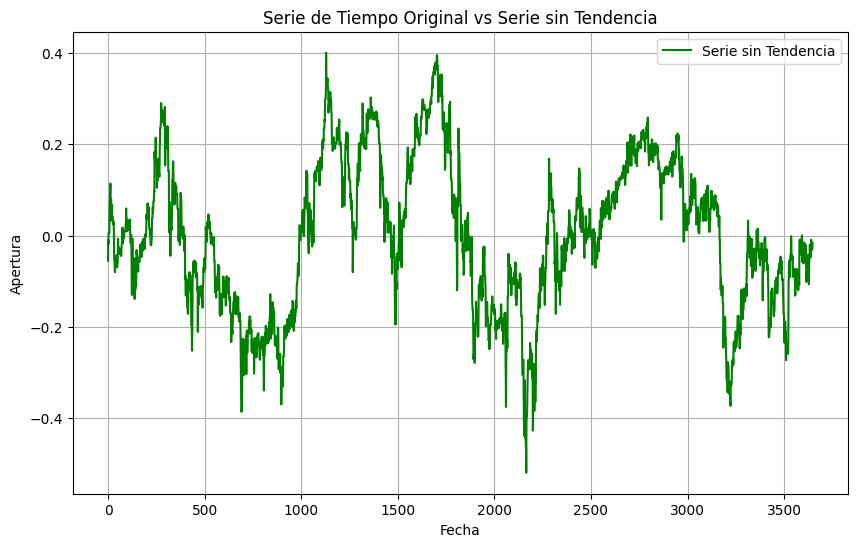

In [25]:
# Eliminamos la tendencia de la serie en escala logarítmica
BoxCox_sin_tend = BoxCox - fit_BoxCox.fittedvalues

# Gráfico de la serie de tiempo original y la serie sin tendencia
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox_sin_tend, label='Serie sin Tendencia', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

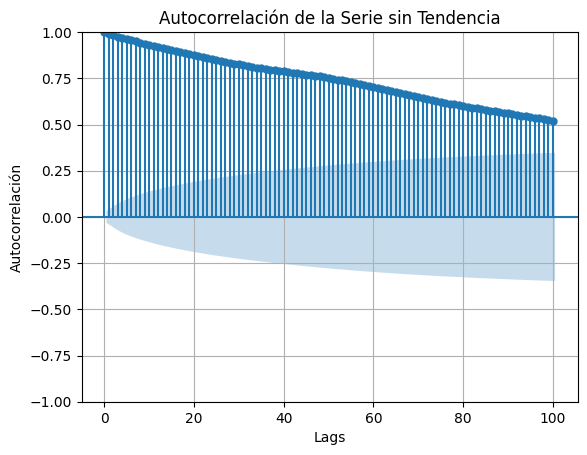

In [27]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(BoxCox_sin_tend, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(BoxCox_sin_tend, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

Muy similar a los datos sin tranformar, no parece que el metodo funcione para eliminar la tendencia de la serie temporal

In [28]:
original_data = ARGOS["Apertura"]

<h3 style="color: #011f4b;">LOESS PARA BOXCOX</h3>

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

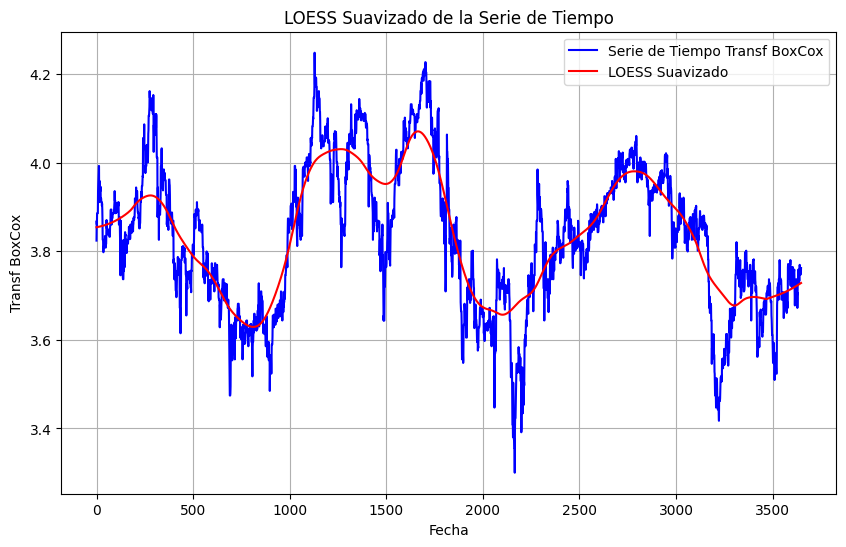

In [30]:
# Definir la ventana de suavizado (ancho de banda) para LOESS
frac = 0.1  # Porcentaje de puntos a incluir en cada ajuste local (puedes ajustar este valor)

# Aplicar LOESS a la serie de tiempo
loess_smoothed = sm.nonparametric.lowess(BoxCox, np.arange(len(ARGOS["Apertura"])), frac=frac)

# Extraer los valores suavizados y las coordenadas x
smoothed_values = loess_smoothed[:, 1]
indices = loess_smoothed[:, 0]

# Graficar la serie de tiempo original y la curva suavizada por LOESS
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox, label='Serie de Tiempo Transf BoxCox', color='blue')
plt.plot(ARGOS.index, smoothed_values, label='LOESS Suavizado', color='red')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('LOESS Suavizado de la Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

Parce que el método LOESS es más efectivo que el método lineal tradicional tratando de estimar la tendencia de la serie temporal

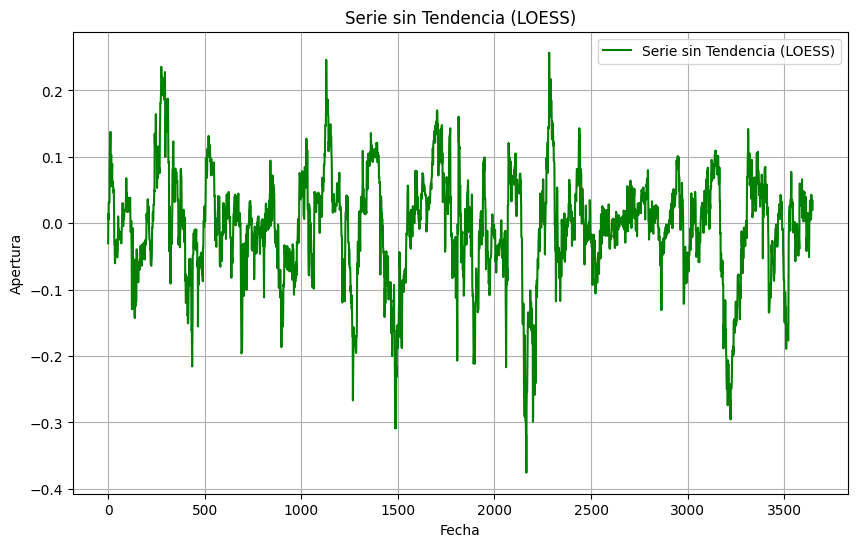

In [31]:
# Eliminar la tendencia obtenida por LOESS
BoxCox_sin_ten_loess = BoxCox - smoothed_values

# Graficar la serie de tiempo original y la serie sin tendencia por LOESS
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox_sin_ten_loess, label='Serie sin Tendencia (LOESS)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie sin Tendencia (LOESS)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

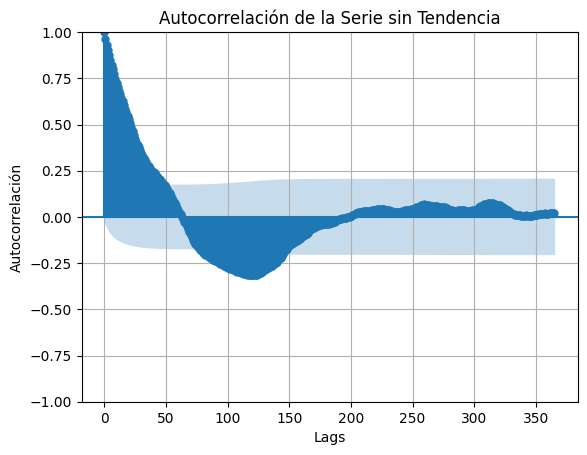

In [32]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(BoxCox_sin_ten_loess, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(BoxCox_sin_ten_loess, lags=365, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

En el grafico de autocorrelacion se puede observar una disminucion más rapida de la correlacion entre los rezagos pero esta no se estabiliza con rapidez

<h3 style="color: #011f4b;">DESCOMPOSICION STL</h3>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

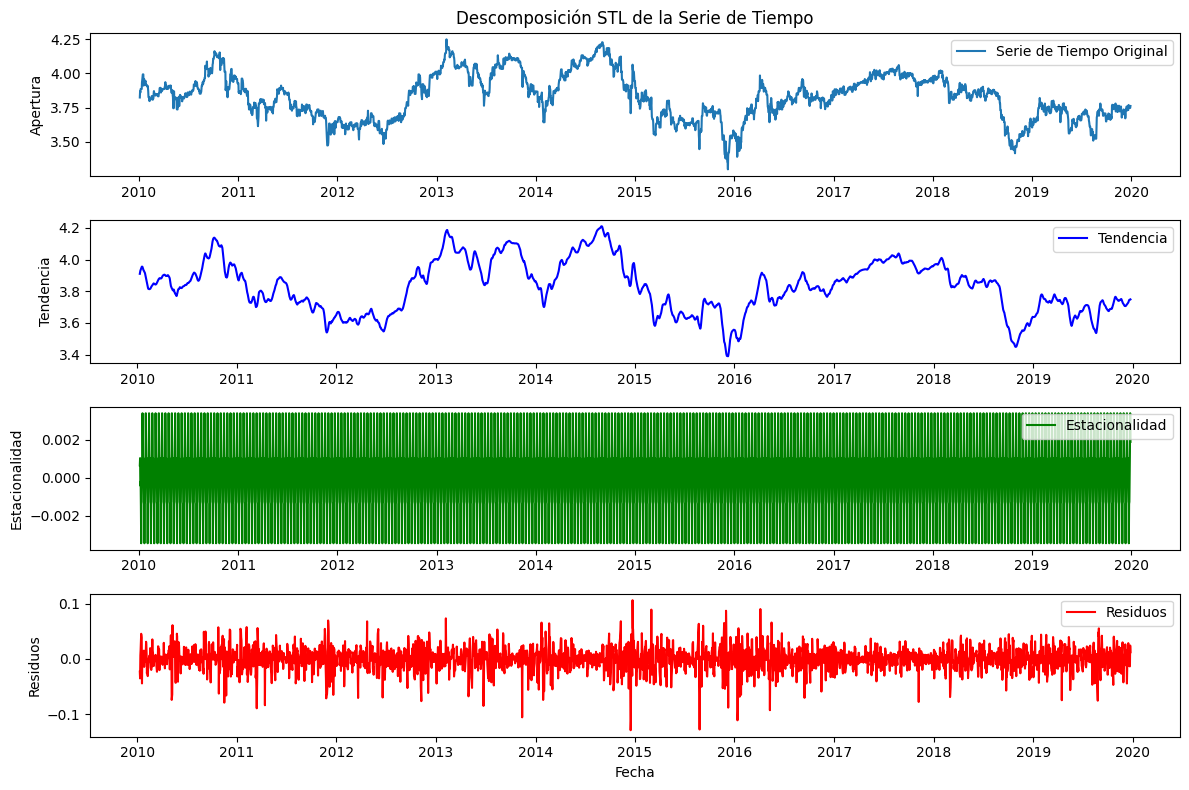

In [34]:
# Aplicar descomposición STL a la serie de tiempo
stl_result = sm.tsa.seasonal_decompose(BoxCox, period=12, model="additive")

# Graficar las componentes de la descomposición STL
plt.figure(figsize=(12, 8))

# Serie de tiempo original
plt.subplot(411)
plt.plot(ARGOS['Fecha'], BoxCox, label='Serie de Tiempo Original')
plt.legend()
plt.title('Descomposición STL de la Serie de Tiempo')
plt.ylabel('Apertura')

# Componente de tendencia
plt.subplot(412)
plt.plot(ARGOS['Fecha'], stl_result.trend, label='Tendencia', color='blue')
plt.legend()
plt.ylabel('Tendencia')

# Componente estacional
plt.subplot(413)
plt.plot(ARGOS['Fecha'], stl_result.seasonal, label='Estacionalidad', color='green')
plt.legend()
plt.ylabel('Estacionalidad')

# Residuos
plt.subplot(414)
plt.plot(ARGOS['Fecha'], stl_result.resid, label='Residuos', color='red')
plt.legend()
plt.ylabel('Residuos')

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

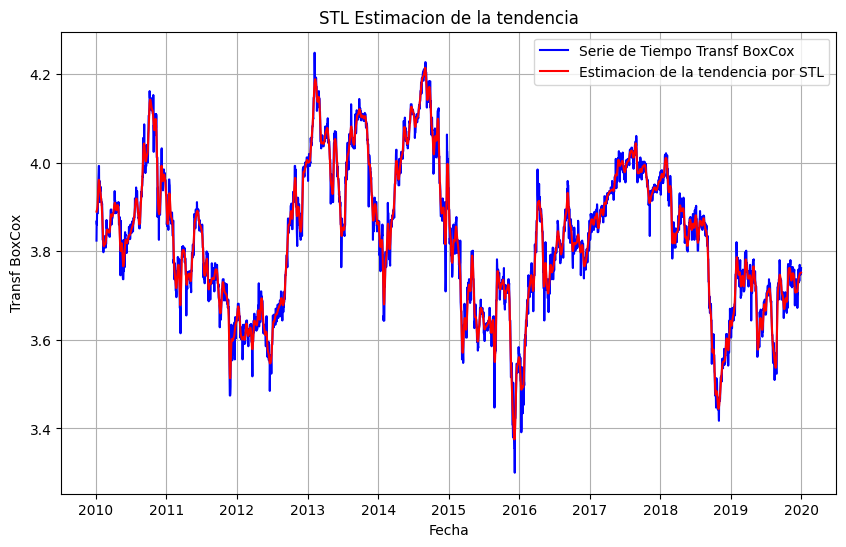

In [36]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': BoxCox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# DESCOMPOSICION STL
stl = STL(df_BoxCox['BoxCox'])
result = stl.fit()

# Estimación de la tendencia por STL
tendencia_stl = result.trend

# Graficar la serie de tiempo original y la curva suavizada por LOESS
plt.figure(figsize=(10, 6))
plt.plot(ARGOS['Fecha'], BoxCox, label='Serie de Tiempo Transf BoxCox', color='blue')
plt.plot(ARGOS['Fecha'], tendencia_stl, label='Estimacion de la tendencia por STL', color='red')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('STL Estimacion de la tendencia')
plt.legend()
plt.grid(True)
plt.show()

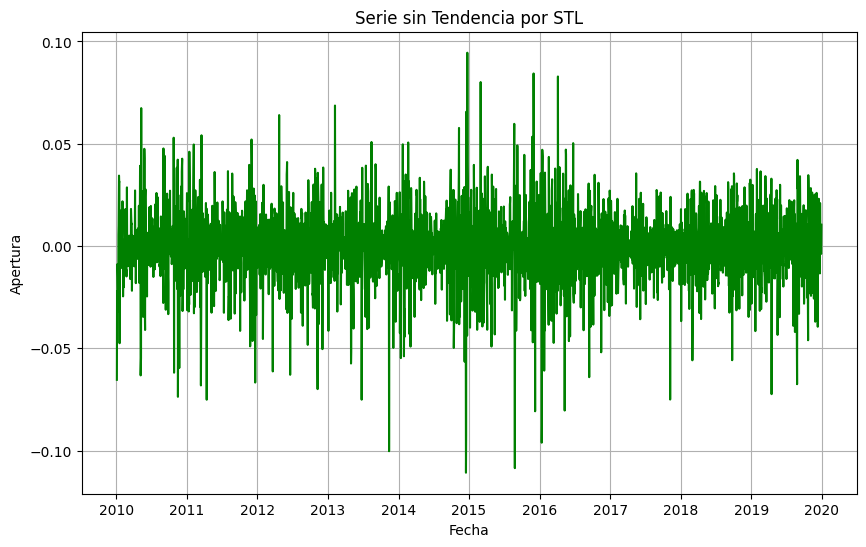

In [37]:
# Serie sin tendencia por STL
sin_tendencia_stl = df_BoxCox['BoxCox'] - tendencia_stl

# Graficar la serie sin tendencia por STL
plt.figure(figsize=(10, 6))
plt.plot(sin_tendencia_stl,color='green')
plt.title('Serie sin Tendencia por STL')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

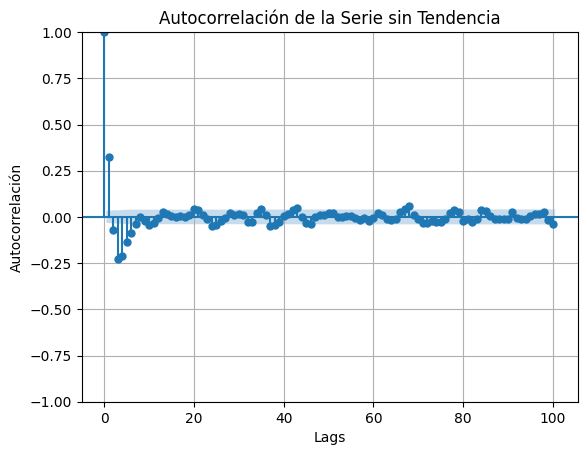

In [38]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(sin_tendencia_stl, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(sin_tendencia_stl, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

Usando la estimación de tendencia por STL, se puede observar lo que realmente buscamos, un gráfico de Autocorrelación donde los valores de correlación entre rezago y rezago disminuyen rápidamente para luego estabilizarse alrededor del 0, hasta el momento, es el método que más nos ha funcionado para eliminar la tendencia.

<Figure size 1000x600 with 0 Axes>

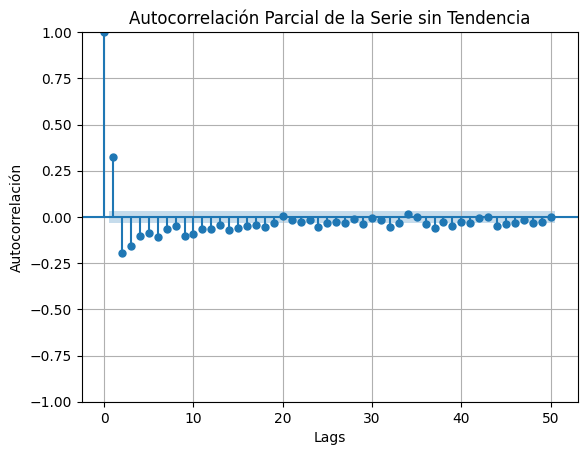

In [39]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(sin_tendencia_stl, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_pacf(sin_tendencia_stl, lags=50, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación Parcial de la Serie sin Tendencia')
plt.grid(True)
plt.show()

El gráfico de Autocorrelación parcial en este caso, además de indicar que la estimación y eliminación de la tendencia se realizó con éxito, también no indica la posibilidad de ajustar un modelo AR(p) del cual hablaremos más adelante.

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO SPLINES</h3>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

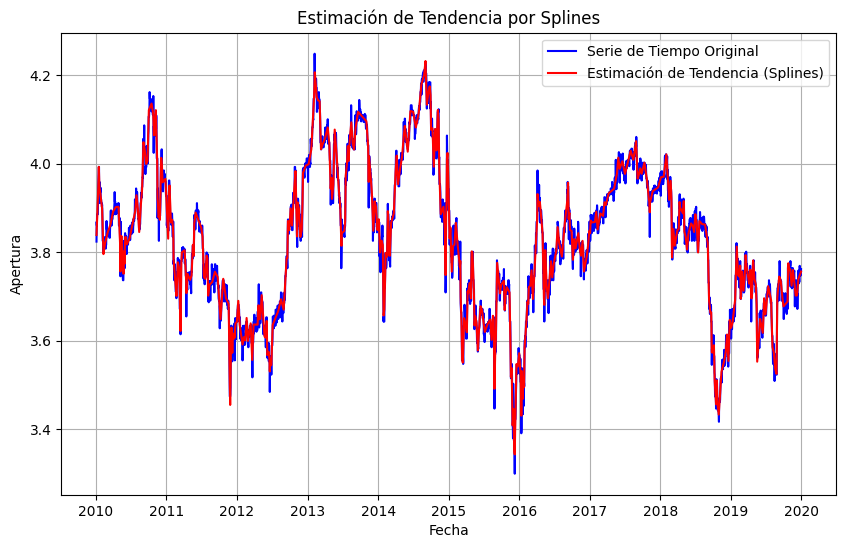

In [41]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': BoxCox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Ajuste de splines para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste spline
values = df_BoxCox['BoxCox'].values

# Ajustar un spline cúbico suave
spline = UnivariateSpline(dates, values, k=1, s = 0.9)  # k=3 para un spline cúbico
trend_spline = spline(dates)  # Valores estimados de la tendencia

# Graficar la serie de tiempo original y la tendencia estimada por splines
plt.figure(figsize=(10, 6))
plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
plt.plot(df_BoxCox.index, trend_spline, label='Estimación de Tendencia (Splines)', color='red')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Estimación de Tendencia por Splines')
plt.legend()
plt.grid(True)
plt.show()

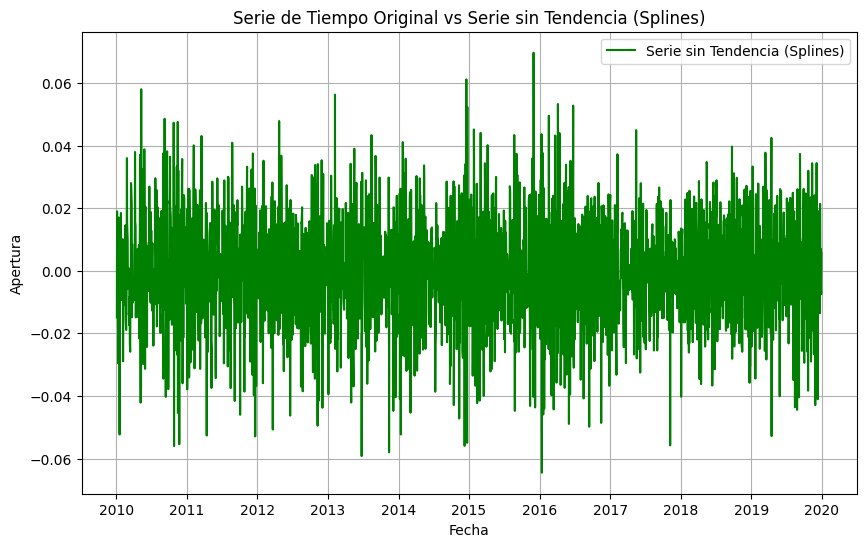

In [42]:
# Serie sin tendencia (remover la tendencia estimada por splines)
sin_tendencia_spline = df_BoxCox['BoxCox'] - trend_spline

# Graficar la serie de tiempo original y la serie sin tendencia por splines
plt.figure(figsize=(10, 6))
plt.plot(df_BoxCox.index, sin_tendencia_spline, label='Serie sin Tendencia (Splines)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia (Splines)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

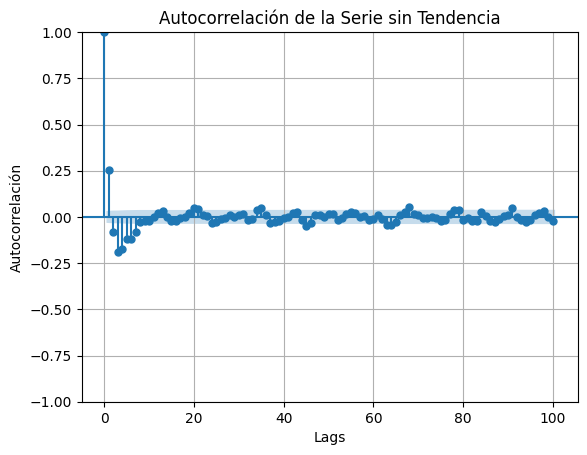

In [43]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(sin_tendencia_spline, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(sin_tendencia_spline, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

En la eliminación de la tendencia usando Splines también logramos observar una buena estimación de la tendencia, lo cual se ve reflejado luego de la eliminación de esta de la serie en el gráfico de Autocorrelación, en el cual podemos observar como la correlación entre rezagos disminuye notoria y rápidamente a 0 luego de un par de ellos, todo parece indicar que lo correcto sería utilizar 7 rezagos en futuros análisis.

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO REGRESION KERNEL</h3>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg

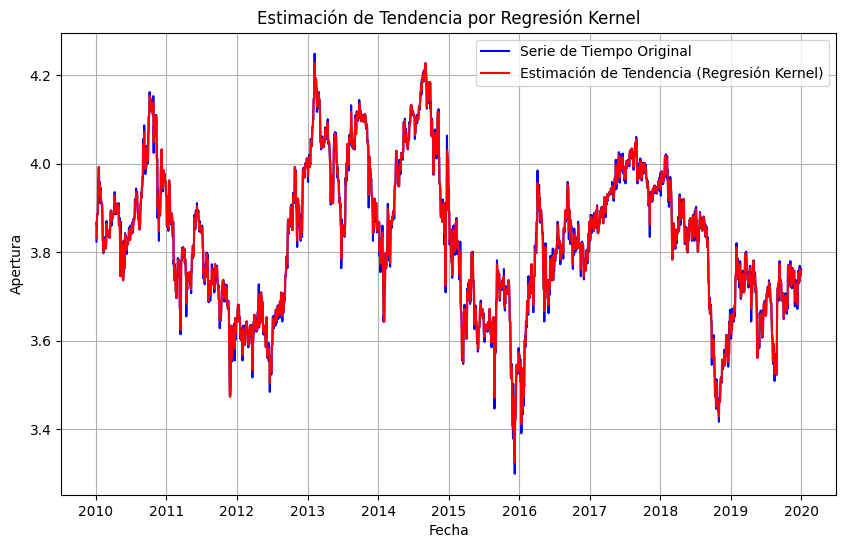

In [45]:
# Suponiendo que ya tienes definida la serie de tiempo ARGOS['Apertura']

# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': BoxCox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Preprocesamiento de datos
# Eliminar filas con valores faltantes
df_BoxCox.dropna(inplace=True)

# Ajuste de regresión kernel para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste kernel
values = df_BoxCox['BoxCox'].values

# Ajustar regresión kernel con un kernel gaussiano y un ancho de banda automático
try:
    kernel_reg = KernelReg(values, dates, var_type='c', reg_type='lc', bw='cv_ls')  # 'c' para variable continua
    trend_kernel, _ = kernel_reg.fit()
    
    # Graficar la serie de tiempo original y la tendencia estimada por regresión kernel
    plt.figure(figsize=(10, 6))
    plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
    plt.plot(df_BoxCox.index, trend_kernel, label='Estimación de Tendencia (Regresión Kernel)', color='red')
    plt.xlabel('Fecha')
    plt.ylabel('Apertura')
    plt.title('Estimación de Tendencia por Regresión Kernel')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error en la estimación de la tendencia por regresión kernel: {e}")


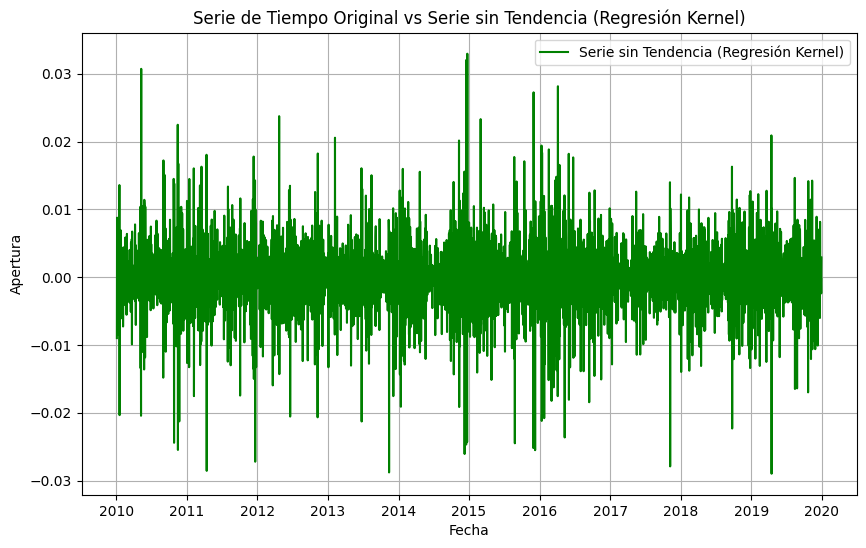

In [46]:
# Serie sin tendencia (remover la tendencia estimada por regresión kernel)
sin_tendencia_kernel = df_BoxCox['BoxCox'] - trend_kernel

# Graficar la serie de tiempo original y la serie sin tendencia por regresión kernel
plt.figure(figsize=(10, 6))
plt.plot(df_BoxCox.index, sin_tendencia_kernel, label='Serie sin Tendencia (Regresión Kernel)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia (Regresión Kernel)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

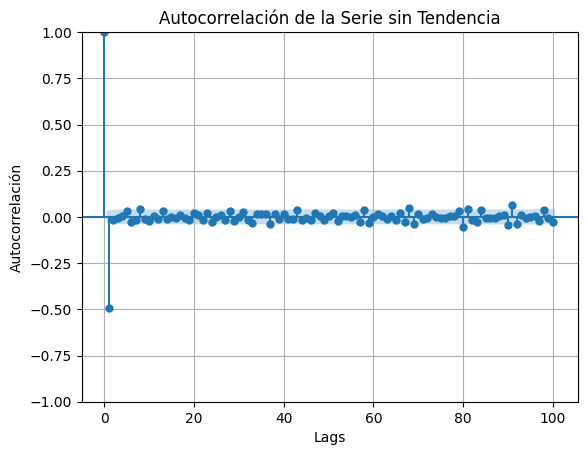

In [47]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(sin_tendencia_kernel, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(sin_tendencia_kernel, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

El método Kernel para la eliminación de la tendencia nos deja como resultado, en el gráfico de autocorrelación, una disminución muy significativa a comparación de los otros métodos utilizados para la estimación y eliminación de la tendencia en la Serie, dejando en evidencia la relación de tan solo 2 de los rezagos. 

<h3 style="color: #011f4b;">DIFERENCIA ORDINARA</h3>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [49]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(BoxCox, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(BoxCox, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): 0.9913023479244938
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -3.1844961312688524
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


El coeficiente del primer rezago del modelo AR sobre la serie original es muy cercano a 1 (0.991), lo que sugiere una fuerte autocorrelación y posible no estacionariedad.

In [50]:
# Serie Diferenciada
Diff_BoxCox = np.diff(BoxCox, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_BoxCox, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_BoxCox, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -20.41941538842336
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


La prueba ADF se usa para verificar la estacionariedad de la serie. Un valor de p bajo (p < 0.05) indica que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria (es no estacionaria). 
En la serie original, el estadístico ADF es -3.184, lo que sugiere que es marginalmente estacionaria (p-valor < 0.05). Luego en la serie diferenciada, el estadístico ADF es -20.419, lo que indica una fuerte evidencia de estacionariedad (p-valor < 0.05).

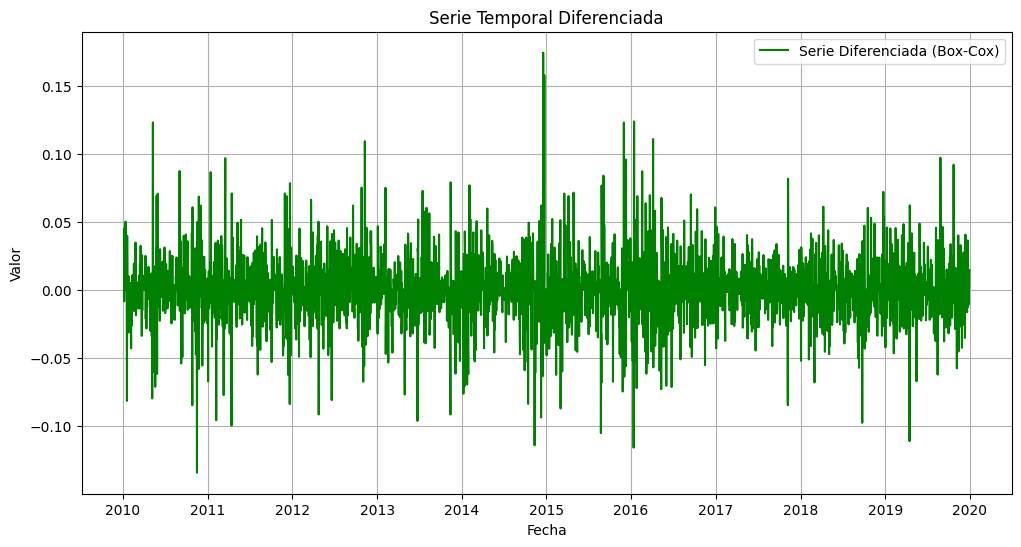

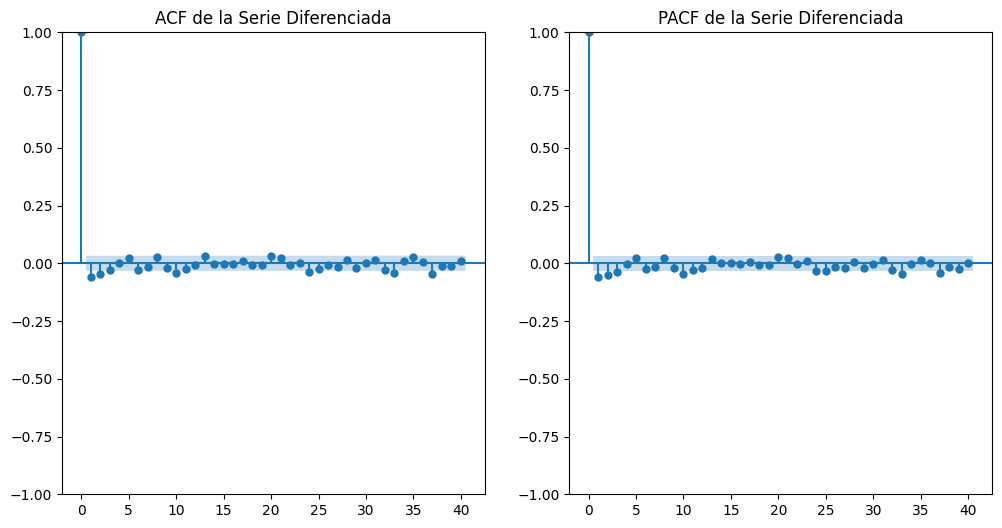

In [51]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff_df = pd.DataFrame({'Fecha': ARGOS['Fecha'][1:], 'Diff_BoxCox': Diff_BoxCox})

# Graficar la serie diferenciada
plt.figure(figsize=(12, 6))
plt.plot(diff_df['Fecha'], diff_df['Diff_BoxCox'], label='Serie Diferenciada (Box-Cox)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(Diff_BoxCox, lags=40, ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.subplot(122)
plot_pacf(Diff_BoxCox, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.show()

In [52]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(sin_tendencia_kernel, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(sin_tendencia_kernel, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): -0.4923098863520624
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -29.8619095840133
Valor crítico al 1%: -3.432150254165979
Valor crítico al 5%: -2.8623354519441797
Valor crítico al 10%: -2.567193431297053
Es estacionaria (p-valor): True


 - El coeficiente del primer rezago es significativo y negativo (-0.492), lo que sugiere que hay una correlación inversa entre valores consecutivos. Esto podría significar que después de eliminar la tendencia, la serie tiende a oscilar alrededor de su media. 

 - El estadístico ADF altamente negativo (-29.861) y el p-valor menor que 0.05 indican que la serie es estacionaria. Esto es una confirmación de que la eliminación de la tendencia ha sido efectiva y la serie no presenta una tendencia significativa residual.

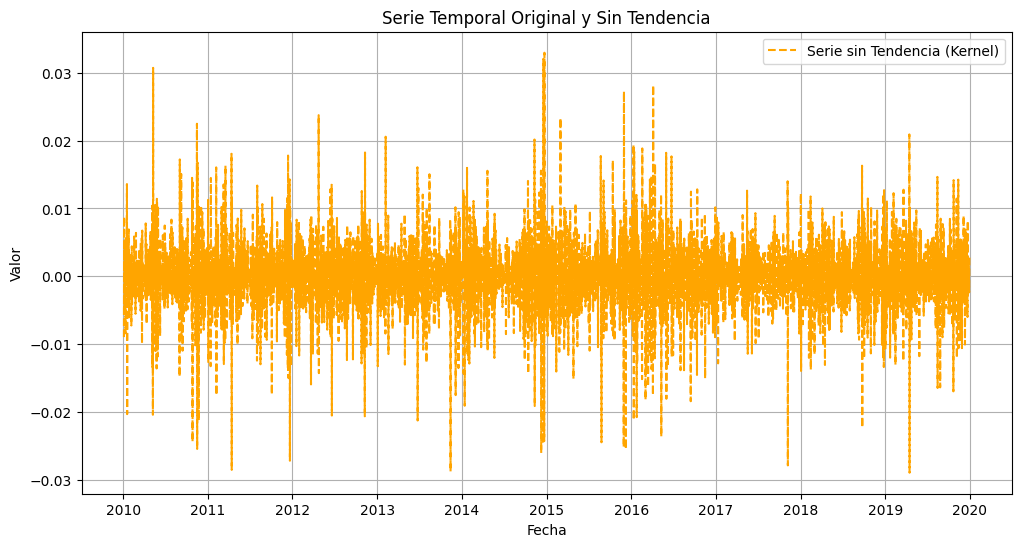

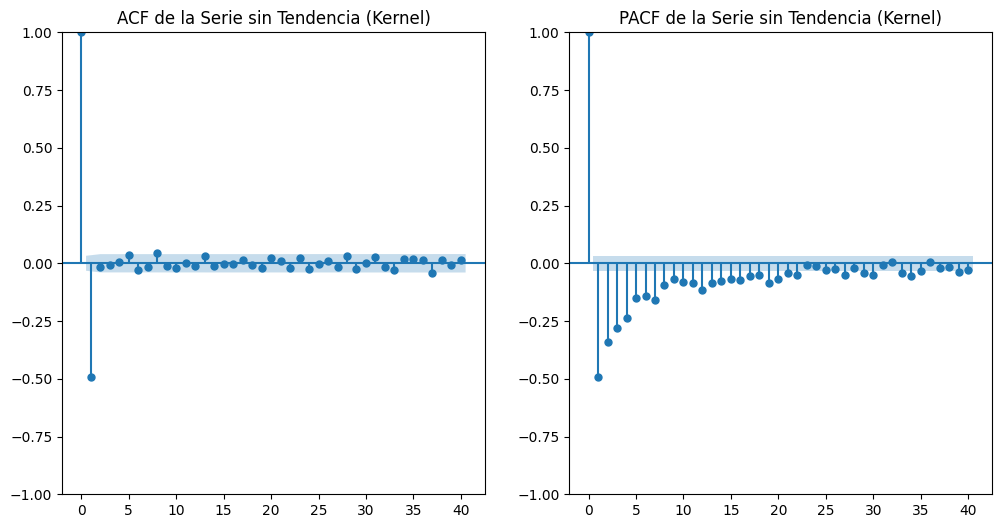

In [53]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualizar la serie original y la serie sin tendencia
plt.figure(figsize=(12, 6))
#plt.plot(ARGOS['Fecha'], BoxCox, label='Serie Original (Box-Cox)')
plt.plot(ARGOS['Fecha'], sin_tendencia_kernel, label='Serie sin Tendencia (Kernel)', linestyle='--', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.title('Serie Temporal Original y Sin Tendencia')
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie sin tendencia
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(sin_tendencia_kernel, lags=40, ax=plt.gca())
plt.title('ACF de la Serie sin Tendencia (Kernel)')

plt.subplot(122)
plot_pacf(sin_tendencia_kernel, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie sin Tendencia (Kernel)')

plt.show()

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

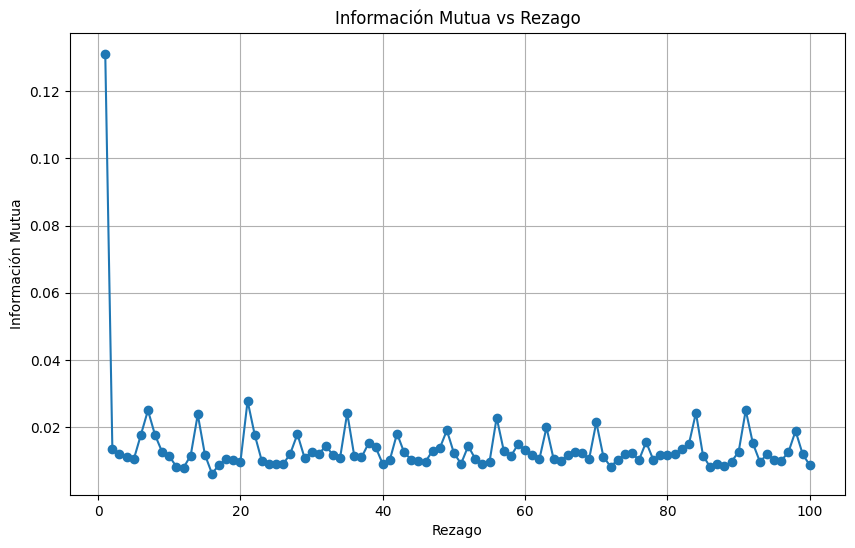

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [mutual_information(sin_tendencia_kernel[:-lag], sin_tendencia_kernel[lag:]) for lag in lag_values]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [55]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 6, 7, 8, 14, 21, 22, 28, 32, 35, 38, 39, 42, 49, 52, 56, 59, 63, 70, 77, 83, 84, 91, 92, 98]


Notamos que los rezagos semanales tienen una importancia superior en términos de MI para la serie, es decir, esto sugiere tomar aquellos rezagos en orden de 7 días, es decir, los rezagos 7 (Semanal), 14 (Quincenal), 21, 28 (Mensual), 35 y de esa manera consecutivamente. 

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

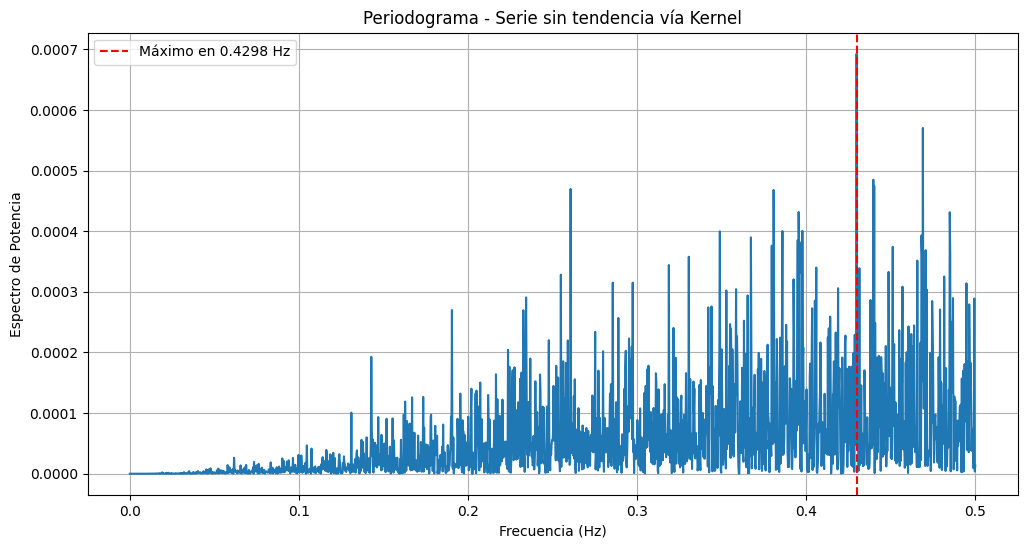

Frecuencia dominante: 0.43
Periodo dominante: 2.33 unidades de tiempo


In [56]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(sin_tendencia_kernel)

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

Esto indica que la serie sin tendencia tiene un ciclo dominante que se repite aproximadamente cada 2.33 unidades de tiempo. Como nuestros datos están en días, esto sugiere una periodicidad de aproximadamente 2.33 días o dicho de una forma más general la serie posee un ciclo dominante de entre 2 y 3 días 